# Amazon Sales Analysis

### Importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset.

In [2]:
Amazon_Sales_DataFrame=pd.read_csv(r"D:\\Project\\Amazon_Analysis\\Amazon_sales\\Amazon_Sale_Report.csv")

### Quick Summary of the Dataaset.

In [3]:
Amazon_Sales_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [4]:
Amazon_Sales_DataFrame.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [5]:
Amazon_Sales_DataFrame.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
Amazon_Sales_DataFrame.tail(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


## 1. Data Cleaning.

### A. Changing datatype of 'Date' form 'object' to 'datetime64[ns, UTC]'.

In [7]:
Amazon_Sales_DataFrame['Date']=Amazon_Sales_DataFrame['Date'].astype('datetime64[ns, UTC]')

### B. Handling Missing Values.

In [8]:
Amazon_Sales_DataFrame['currency']=Amazon_Sales_DataFrame['currency'].fillna("N/A")
Amazon_Sales_DataFrame['Amount']=Amazon_Sales_DataFrame['Amount'].fillna(0)
Amazon_Sales_DataFrame['ship-city']=Amazon_Sales_DataFrame['ship-city'].fillna("N/A")
Amazon_Sales_DataFrame['ship-state']=Amazon_Sales_DataFrame['ship-state'].fillna("N/A")
Amazon_Sales_DataFrame['ship-postal-code']=Amazon_Sales_DataFrame['ship-postal-code'].fillna("N/A")
Amazon_Sales_DataFrame['ship-country']=Amazon_Sales_DataFrame['ship-country'].fillna("N/A")



### C. Counting Duplications with 'Order ID'

In [9]:
Amazon_Sales_DataFrame['Order ID'].duplicated().sum()

np.int64(8747)

### D. Removing duplicates.

In [10]:
Amazon_Sales_DataFrame=Amazon_Sales_DataFrame.drop_duplicates(subset=['Order ID'])

### E. Droping Empty columns.

In [11]:
Amazon_Sales_DataFrame=Amazon_Sales_DataFrame.drop('New',axis=1)
Amazon_Sales_DataFrame=Amazon_Sales_DataFrame.drop('PendingS',axis=1)

### F. Crating new column for calculating Unit-Price.

In [12]:
Amazon_Sales_DataFrame['Unit-Price']=np.where(Amazon_Sales_DataFrame['Qty']!=0,Amazon_Sales_DataFrame['Amount']/Amazon_Sales_DataFrame['Qty'],0)

## 2. KPI's

### A. Total Revenue.

In [13]:
Total_Revenue=Amazon_Sales_DataFrame['Amount'].sum()
Total_Revenue


np.float64(73323468.87)

### B. Unique Orders.

In [14]:
Total_Orders=Amazon_Sales_DataFrame['Order ID'].nunique()
Total_Orders

120229

### C. Number of Cancelled Orders.

In [15]:
Cancelled_Order = Amazon_Sales_DataFrame['Status'][Amazon_Sales_DataFrame['Status']=="Cancelled"].count()
Cancelled_Order

np.int64(17166)

### D. Rate of Cancelled Orders.

In [16]:
percentage_cancelled_Order=(Cancelled_Order/Total_Orders)*100
percentage_cancelled_Order

np.float64(14.277753287476399)

## 3. Visualisation and Grouped Analysis.

### A. Revenue By Category.

Category
Perfume       730727.61
Trousers     5024752.81
Blazzer     10622129.15
Shirt       19574797.54
T-shirt     36684084.00
Name: Amount, dtype: float64

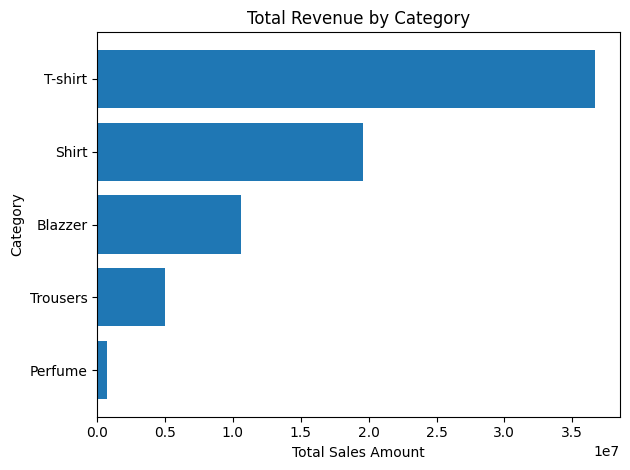

In [17]:
Category_Performance=Amazon_Sales_DataFrame.groupby('Category')['Amount'].sum().sort_values(ascending=True).tail(5)
plt.barh(Category_Performance.index,Category_Performance.values)
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.title('Total Revenue by Category')
plt.tight_layout()
Category_Performance

### B. Size vs. Qty

Size
4XL      361
5XL      484
6XL      625
Free    1940
XS      9090
Name: Qty, dtype: int64

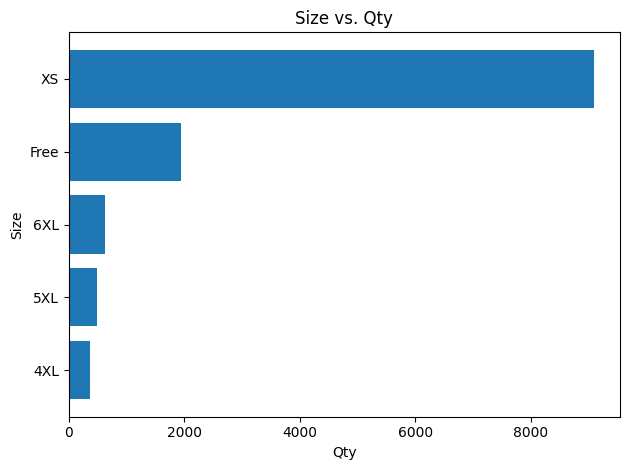

In [18]:
Size_vs_Qty=Amazon_Sales_DataFrame.groupby('Size')['Qty'].sum().sort_values(ascending=True).head(5)
plt.barh(Size_vs_Qty.index,Size_vs_Qty.values)
plt.xlabel('Qty')
plt.ylabel('Size')
plt.title('Size vs. Qty')
plt.tight_layout()
Size_vs_Qty

### C. Fulfilment Distribution

Fulfilment
Amazon      83906
Merchant    36323
Name: count, dtype: int64

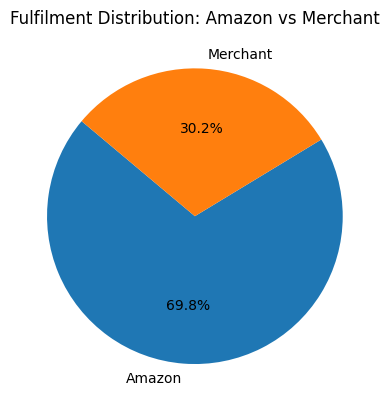

In [19]:
fulfillment_counts=Amazon_Sales_DataFrame['Fulfilment'].value_counts()
plt.pie(fulfillment_counts,labels=fulfillment_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Fulfilment Distribution: Amazon vs Merchant')
fulfillment_counts

### D. B2B vs. Consumer

B2B
False    72782979.14
True       540489.73
Name: Amount, dtype: float64

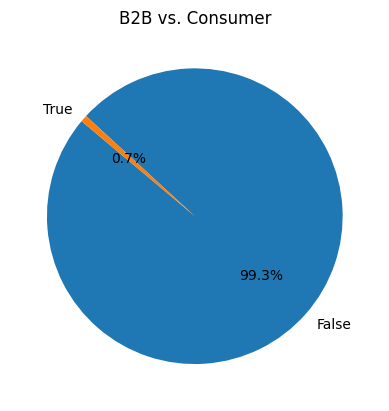

In [20]:
B2B_vs_Consumer=Amazon_Sales_DataFrame.groupby('B2B')['Amount'].sum()
plt.pie(B2B_vs_Consumer,labels=B2B_vs_Consumer.index,autopct='%1.1f%%',startangle=140)
plt.title('B2B vs. Consumer')
B2B_vs_Consumer

### E. Top 5 States

ship-state
MAHARASHTRA      12440118.52
KARNATAKA         9817768.10
UTTAR PRADESH     6437670.88
TELANGANA         6331438.99
TAMIL NADU        5965184.37
Name: Amount, dtype: float64

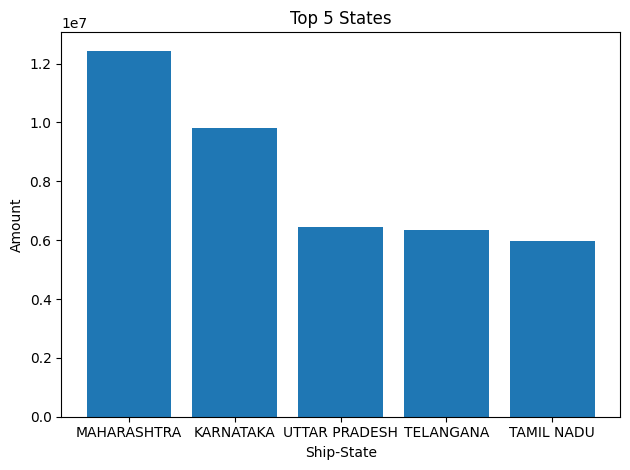

In [21]:
Top_5_States=Amazon_Sales_DataFrame.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(5)
plt.bar(Top_5_States.index,Top_5_States.values)
plt.xlabel("Ship-State")
plt.ylabel("Amount")
plt.title('Top 5 States')
plt.tight_layout()
Top_5_States

# INSIGHTS:
### From my analysis I Found out that the total revenue is 73323468.87 (₹73M).
### The total unique orders are 1,20,229 in that cancelled orders are 17166 and the rate of cancellation is 14.27%.
### T-shirt is most revenue generated category followed by Shirt, Blazzer, Trousers, Perfume.
### Consumer sales drive the core business, while B2B remains a niche segment with growth potential.
### Maharashtra and Karnataka, as these are the high-conversion zones where most sales happens.